## Objective of the notebook

 Heart Disease 자료를 탐색하고, 심장질환을 분류하기 위해 sklearn의 모든 분류모형 테스트하고 그 과정을 알아보고자 한다.
 


## About the dataset: Heart Disease

 심장질환 자료는 총 76개의 속성으로 이루어져 있으나, 공개된 모든실험에서 사용한 14개 속성으로 이루어진 자료를 이용하고자 한다. 최근까지 연구된 Cleveland database(n=303)를 이용하였으며, 총 303명의 환자자료 중 164명이 심장질환이었다.
 
 14개 자료 필드는 아래의 표와 같다.
 
 변수명 | 설명 | 척도
 ---|---|---
age| 환자 나이 | 구간-비율
sex| 환자성별 (1 = male; 0 = female) | 명목
cp| 흉통유형 (1=정형 협심증 통증, 2=비정형 협심증 통증, 3=비협심증 통증(협심증 관련통증 아님), 4=무증상) | 명목
trestbps | 휴식시 혈압(병원 입원시, mm Hg) | 비율
chol| 총콜레스테롤, mg/dl | 비율
fbs| 공복시 혈당, > 120 mg/dl) (1 = true; 0 = false) | 명목
restecg| 심전도 결과 | 명목
thalach| 최대 심박수 | 비율
exang| 운동형 협심증 여부(1 = yes; 0 = no) | 명목
oldpeak| ST depression induced by exercise relative to rest | 비율
slope| ST segment의 경사 (1=upsloping, 2=flat, 3=downsloping) | 명목
ca| 채색된 주요 혈관수 (0-3) | 구간
thal| 결손된 혈관 3 = normal; 6 = fixed defect; 7 = reversable defect | 명목
target| 심장질환 여부 1 or 0(target) | 명목

In [1]:
#자료 불러오기 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
heartData = pd.read_csv('heart.csv')

In [2]:
heartData.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
#자료의 결측치 갯수 확인
heartData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# 카테고리와 연속 feature name
cat_feature_list = ['sex','cp','restecg','fbs','exang','slope','thal']
num_feature_list = ['age','trestbps','chol','thalach','ca','oldpeak']

In [6]:
#카테고리 변수 속성변경
for i in cat_feature_list:
    heartData[i]=pd.Categorical(heartData[i])

## 자료 탐색

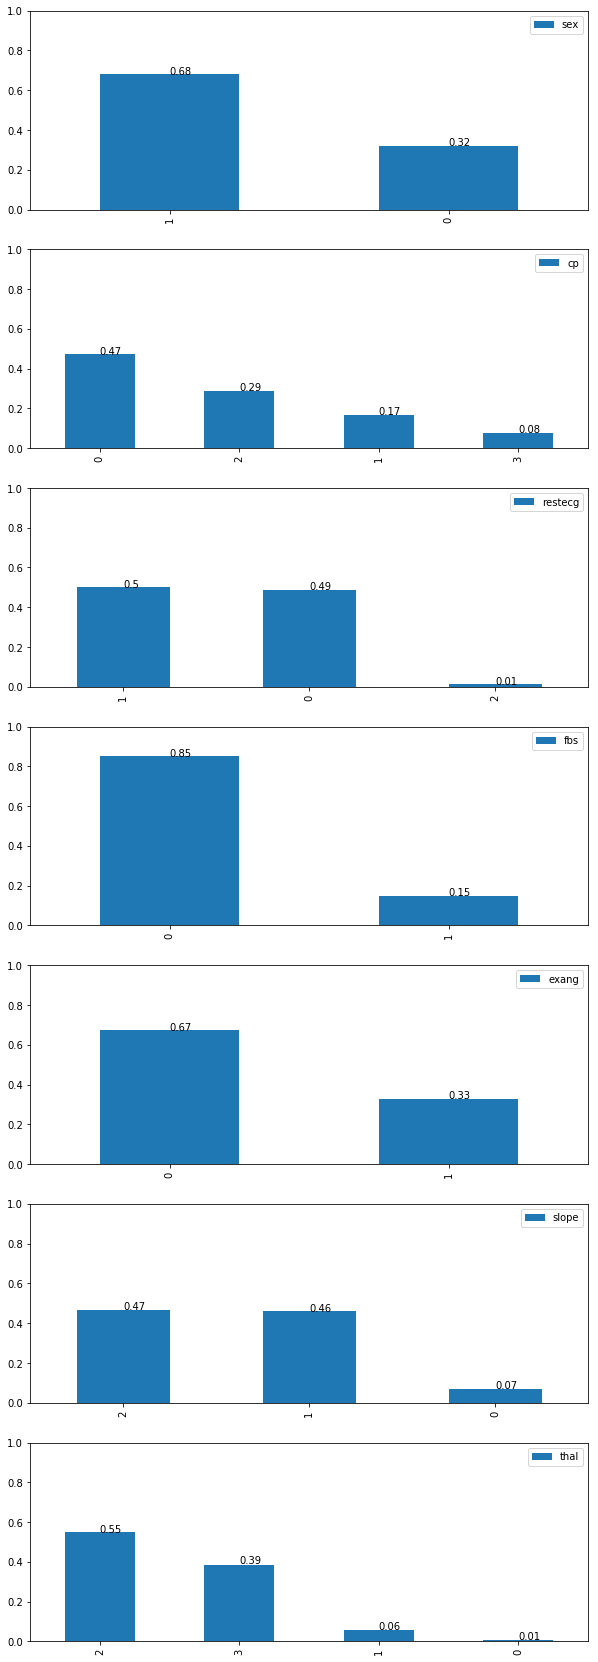

In [9]:
# 시각화 하여 확인한다.
import matplotlib.pyplot as plt

fig,  axs = plt.subplots(nrows=7, figsize=(10,30))
n = 0

for i in cat_feature_list:
    cnt_dt = pd.DataFrame(heartData[i].value_counts(normalize=True))
    cnt_dt.plot.bar(ax=axs[n], ylim=([0,1]))
    for idx, label in enumerate(list(cnt_dt.index)): 
        for acc in cnt_dt.columns:
            value = np.round(cnt_dt.iloc[idx][acc],decimals=2)
            axs[n].text(idx, value, str(value))
            #plt.annotate(value, (idx, value), xytext=(0, 15), textcoords='offset pixels')
    n += 1

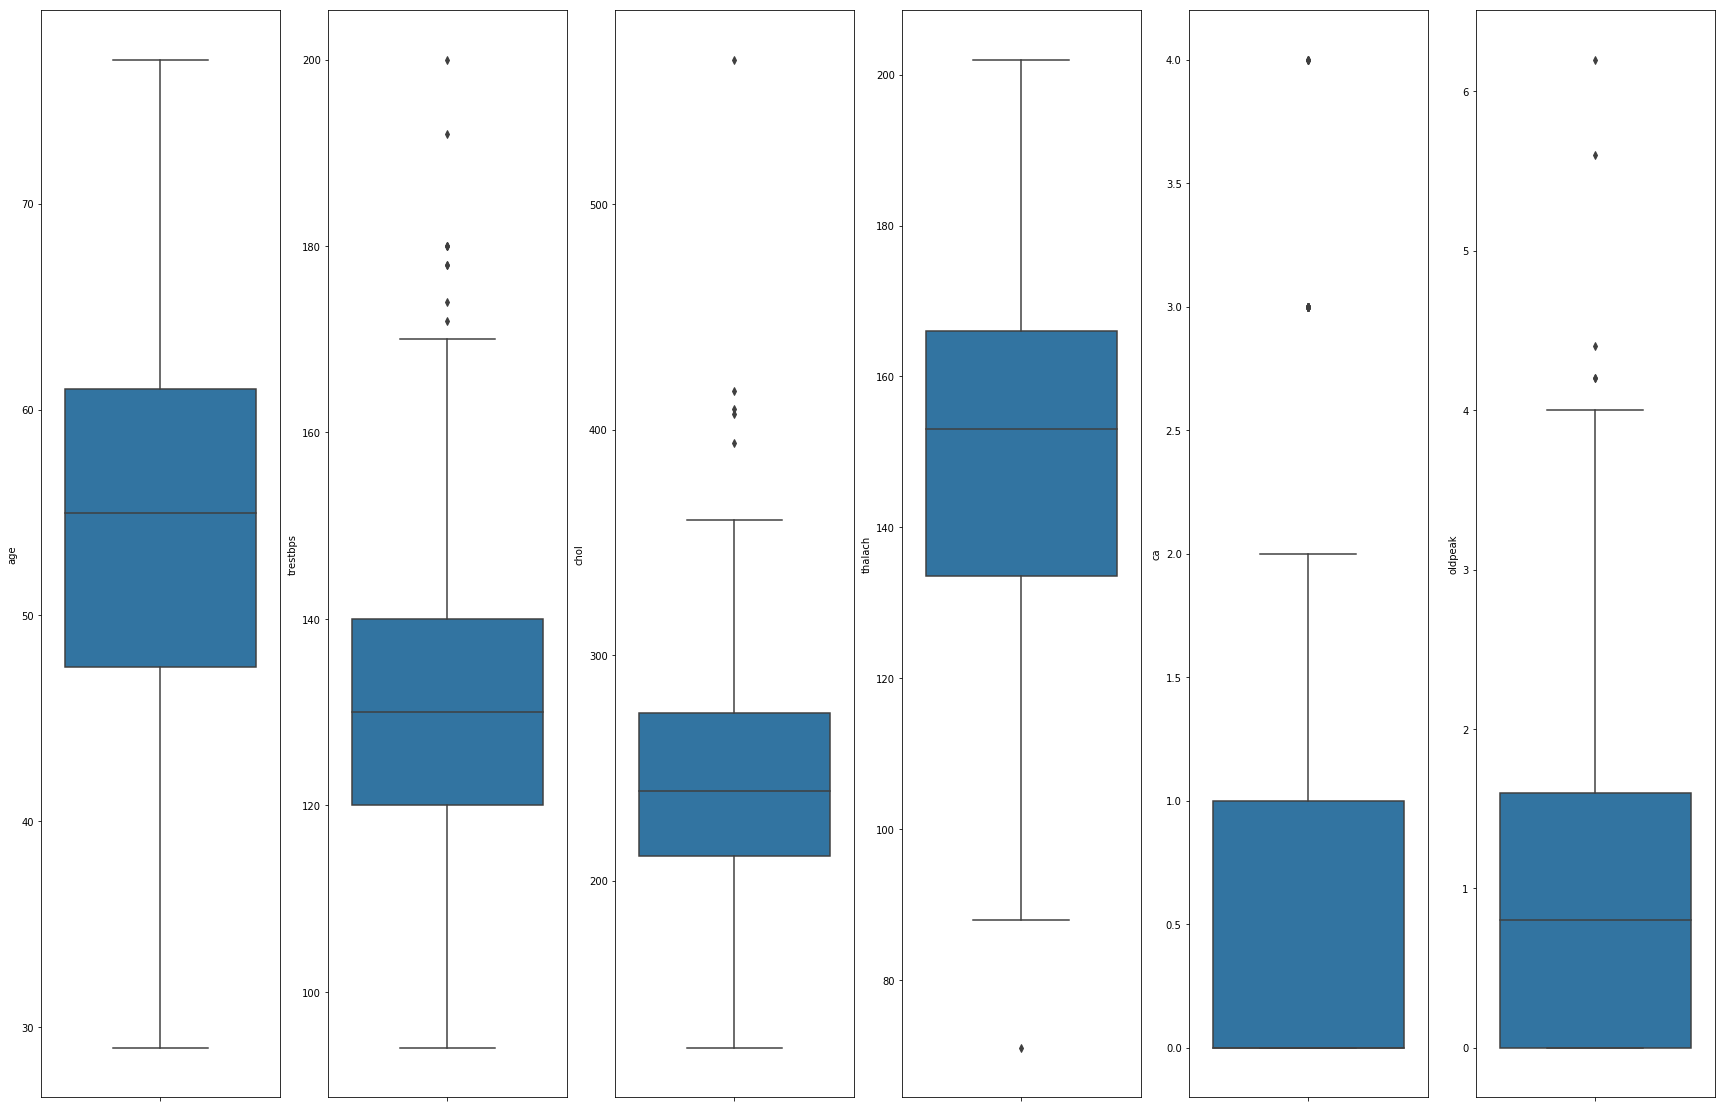

In [10]:
# 시각화 하여 확인한다.
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=6,figsize=(30,20))
n = 0
for i in num_feature_list:
    sns.boxplot(y=heartData[i], ax=axs[n])
    n += 1

In [11]:
heartData[num_feature_list].describe()

,age,trestbps,chol,thalach,ca,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,0.729373,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.022606,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,4.000000,6.200000


In [12]:
# 타겟(심장질환) 환자수 확인
print('number of Heart disease patient =', heartData[(heartData['target'] ==1) ].count()[1])

number of Heart disease patient = 165


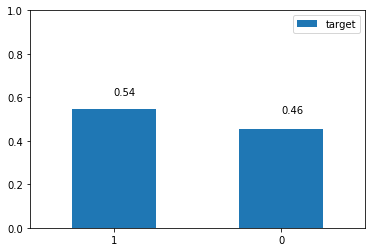

In [13]:
cnt_dt = pd.DataFrame(heartData['target'].value_counts(normalize=True))
cnt_dt.plot.bar(rot=0, ylim=([0,1]))
for idx, label in enumerate(list(cnt_dt.index)): 
        for acc in cnt_dt.columns:
            value = np.round(cnt_dt.iloc[idx][acc],decimals=2)
            plt.annotate(value, (idx, value), xytext=(0, 15), textcoords='offset points')

In [14]:
# Target과 features  분리
target_dt = heartData['target']
features_dt = heartData.drop(columns = ['target'], axis = 1)

In [15]:
target_dt.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [16]:
# one-hot-encoding
features_dt_dm =  pd.get_dummies(features_dt)

In [17]:
features_dt_dm.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_0,cp_1,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [18]:
# Train데이터와 Test를 나눈다.
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_dt_dm, target_dt, random_state=12345)

In [19]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_0,cp_1,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
223,56,200,288,133,4.0,2,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
168,63,130,254,147,1.4,1,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
164,38,138,175,173,0.0,4,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
272,67,120,237,71,1.0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
259,38,120,231,182,3.8,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [20]:
print(y_train.shape)
print(X_train.shape)

(227,)
(227, 26)


# 분류 모형

### DecisionTreeClassifier
---
    의사결정나무는 의사 결정 규칙을 학습하여 대상 변수의 값을 예측하는 모델이다.
    여러 특징 중 하나의 특징을 선택하고 그 특징에 대한 기준값(threshold)을 정하여 구분하는데 이를 분류 규칙(분할기준)이라고 한다.
    규칙을 정하는 방법은 부모노드(상위노드)와 자식노드(하위노드)간의 정보획득량(information gain)를 가장 낮게 만드는 특징과 기준값을 찾는 것이다. 
    정보획득량이란 정보이론에서 다루는데 어떤 특징이 얼마만큼의 정보를 줄수 있는지를 수치화 한 값이다.
    순도(homogeneity)가 증가하고, 불순도(impurity) 또는 불확실성(uncertainty)이 최대로 감소하는 방향으로 학습을 한다.
    
    의사결정나무에서는 지니계수(Gini index)와 엔트로피 불확실성(entropy)를 주로 사용한다. 
    
    DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
    
### RandomForestClassifier
---
    랜덤포레스트는 여러 개의 결정 트리들을 임의적으로 학습하는 방식의 앙상블 방법의 하나이다.
    훈련 과정에서 구성한 결정 트리로부터 분류를 함으로써 동작한다.
    
    RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
    
### AdaBoostClassifier(adaptive boosting)
---
    AdaBoost의 핵심은 약한 학습기의 결과물에 가중치를 더하여 boosting 분류기의 최종결과물을 얻는다.
    AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)
    
    정리글 참고
https://github.com/sung-hyo/Major-keyword/blob/master/bagging_boosting_other_description.ipynb

In [21]:
# 기초 모형
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=20190109).fit(X_train, y_train)

In [22]:
model.score(X_test, y_test)

0.7236842105263158

In [23]:
feature_names = X_test.columns
target_names = ['normal','patient']

#### 그리드 서치를 통하여 매개변수를 변화시켜 최적의 모형을 찾는다
---

In [24]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#교차 검증을 위해 k-fold 객체를 생성한다. 
from sklearn.model_selection import KFold 
kfold = KFold(n_splits=5, random_state=20190102)

from sklearn.pipeline import Pipeline

random_state = [20190102]
# 하이퍼 파라메타
n_neighbors = np.arange(1,20,1)

max_depth = np.arange(1,20,1)

n_features = np.arange(1,10,1)
n_estimators = np.arange(1,10,1)

alpha = np.arange(0.0001,0.001,0.001)

param_grid = [
              {'classifier':[KNeighborsClassifier()],
               'classifier__n_neighbors':n_neighbors},
              {'classifier':[DecisionTreeClassifier()],
               'classifier__max_depth':max_depth},
              {'classifier':[RandomForestClassifier()],
               'classifier__n_estimators':n_estimators},
              {'classifier':[AdaBoostClassifier()],
               'classifier__n_estimators':n_estimators}
             ]
KFold = KFold(n_splits=3, shuffle=True, random_state=20190102)
                 
pipe = Pipeline([('classifier', DecisionTreeClassifier())])

from sklearn.model_selection import GridSearchCV 
## GridSeach : 분류의 성능을 f1점수로 
grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1', cv=KFold, verbose=1, return_train_score=True)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 56 candidates, totalling 168 fits
Wall time: 1.09 s


[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    0.9s finished


In [25]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['rank_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
# zip는 동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r"% (mean, stdev, param))

Best: 0.850825 using {'classifier': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=9, random_state=None), 'classifier__n_estimators': 9}
53.000000 (0.014747) with: {'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform'), 'classifier__n_neighbors': 1}
56.000000 (0.053454) with: {'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform'), 'classifier__n_neighbors': 2}
48.000000 (0.014749) with: {'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform'), 'classifier__n_neighbors': 3}
55.000000 (0.056211) with: {'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30

In [26]:
grid_result.cv_results_

{'mean_fit_time': array([0.00520754, 0.        , 0.        , 0.        , 0.00520698,
        0.        , 0.        , 0.01041937, 0.        , 0.        ,
        0.        , 0.00520706, 0.00133228, 0.        , 0.        ,
        0.        , 0.        , 0.00520666, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00521811, 0.        ,
        0.        , 0.        , 0.        , 0.00520945, 0.00521   ,
        0.        , 0.00520444, 0.        , 0.00520865, 0.00520714,
        0.        , 0.        , 0.        , 0.        , 0.00520412,
        0.00520794, 0.00520722, 0.00520857, 0.0052073 , 0.01041301,
        0.01041365, 0.00520754, 0.00521111, 0.00520889, 0.        ,
        0.00521445, 0.        , 0.01042382, 0.00520953, 0.00520555,
        0.01562222]),
 'mean_score_time': array([0.        , 0.00520746, 0.        , 0.        , 0.        ,
        0.00520651, 0.        , 0.        , 0.0052015 , 0.        ,
        0.        , 0.00166575, 0.00133197, 0.        , 0.

In [27]:
print("Grid search를 이용하여 구한 최적의 파라미터는 : {}".format(grid_result.best_params_))

Grid search를 이용하여 구한 최적의 파라미터는 : {'classifier': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=9, random_state=None), 'classifier__n_estimators': 9}


In [28]:
grid_result.score(X_test, y_test)

0.7733333333333333

In [29]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
pred = grid_result.predict(X_test)

print("f1: {:.3f}".format(f1_score(y_test, pred)))
print("recall: {:.3f}".format(recall_score(y_test, pred)))
print("precision_score: {:.3f}".format(precision_score(y_test, pred)))

f1: 0.773
recall: 0.690
precision_score: 0.879


In [30]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[30  4]
 [13 29]]


([<matplotlib.axis.YTick at 0x18ad58125f8>,
 <a list of 2 Text yticklabel objects>)

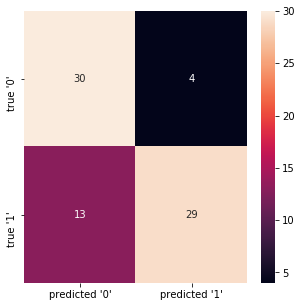

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt="d")
plt.xticks([.5, 1.5], ["predicted '0'", "predicted '1'"], size=10)
plt.yticks([.5, 1.5], ["true '0'", "true '1'"], size=10)

### RandomizedSeachCV 를 이용
---
    앞에서 그리드 서치결과를 바탕으로 보다 세밀한 파라메타 서치

In [34]:
%%time
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=9)

param_grid = {"max_depth": sp_randint(1, 10),
              "max_features": sp_randint(1, 20),
              "min_samples_split": sp_randint(2, 30),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

ramdom_grid = RandomizedSearchCV(clf, param_distributions=param_grid, scoring='f1', cv=5, verbose=1,random_state=12345)

ramdom_grid_result = ramdom_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 650 ms


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


In [35]:
print("Grid search를 이용하여 구한 최적의 파라미터는 : {}".format(ramdom_grid_result.best_params_))

Grid search를 이용하여 구한 최적의 파라미터는 : {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 7, 'min_samples_split': 27}


In [36]:
ramdom_grid_result.score(X_test, y_test)

0.8051948051948051